# Figure 4

In [1]:
import numpy as np
import pandas as pd
import numpy.random as npr
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle 

npr.seed(0)

In [2]:
from general_utilities import * #imports utilities.py file which has functions for plotting psychometrics and other useful things
from HMM_functions import * #imports HMM_functions.py file which has functions for getting the data read for the ssm.HMM
from functions_for_making_plots import * 
from decoder_functions import * #imports decoder_functions.py file which has functions for decoding things from neural data 
from data_extraction_for_svm import *

## Plotting preferences

In [3]:
colors = np.array([[0,102,51],[237,177,32],[233,0,111],[39,110,167]])/255

#Remove right and top spines from plots (personal preference)
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
dpi = 1600

save_path = '/Users/akhilbandi/Library/Mobile Documents/com~apple~CloudDocs/Documents/Portfolio/code_projects/Bandi & Runyan 2024/figures/'

## Figure 4A

In [4]:
# Define the filename from which to load the dictionary
filename = 'noise_corr_coupling_results_dict.pkl'

# Open the file in binary read mode and load the dictionary using pickle
with open(filename, 'rb') as file:
    noise_corr_coupling_results_dict = pickle.load(file)

# Dynamically create variables from the dictionary keys
for key in noise_corr_coupling_results_dict:
    globals()[key] = noise_corr_coupling_results_dict[key]

In [13]:
#AC noise correlation stats

u_statistic, p_value = stats.mannwhitneyu(noise_corr_st1_AC, noise_corr_st23_AC, alternative='two-sided')
print(f"U statistic: {u_statistic}")
print(f"P-value: {p_value}")

num_tests = 5
alpha = 0.05 / num_tests

if p_value < alpha:
    print("The difference between the groups is statistically significant.")
else:
    print("The difference between the groups is not statistically significant.")

U statistic: 25202640.5
P-value: 0.09679781623022123
The difference between the groups is not statistically significant.


In [14]:
#PPCC noise correlation stats

u_statistic, p_value = stats.mannwhitneyu(noise_corr_st1_PPC, noise_corr_st23_PPC, alternative='two-sided')
print(f"U statistic: {u_statistic}")
print(f"P-value: {p_value}")

num_tests = 5
alpha = 0.05 / num_tests

if p_value < alpha:
    print("The difference between the groups is statistically significant.")
else:
    print("The difference between the groups is not statistically significant.")

U statistic: 60496285.0
P-value: 2.422226501725475e-09
The difference between the groups is statistically significant.


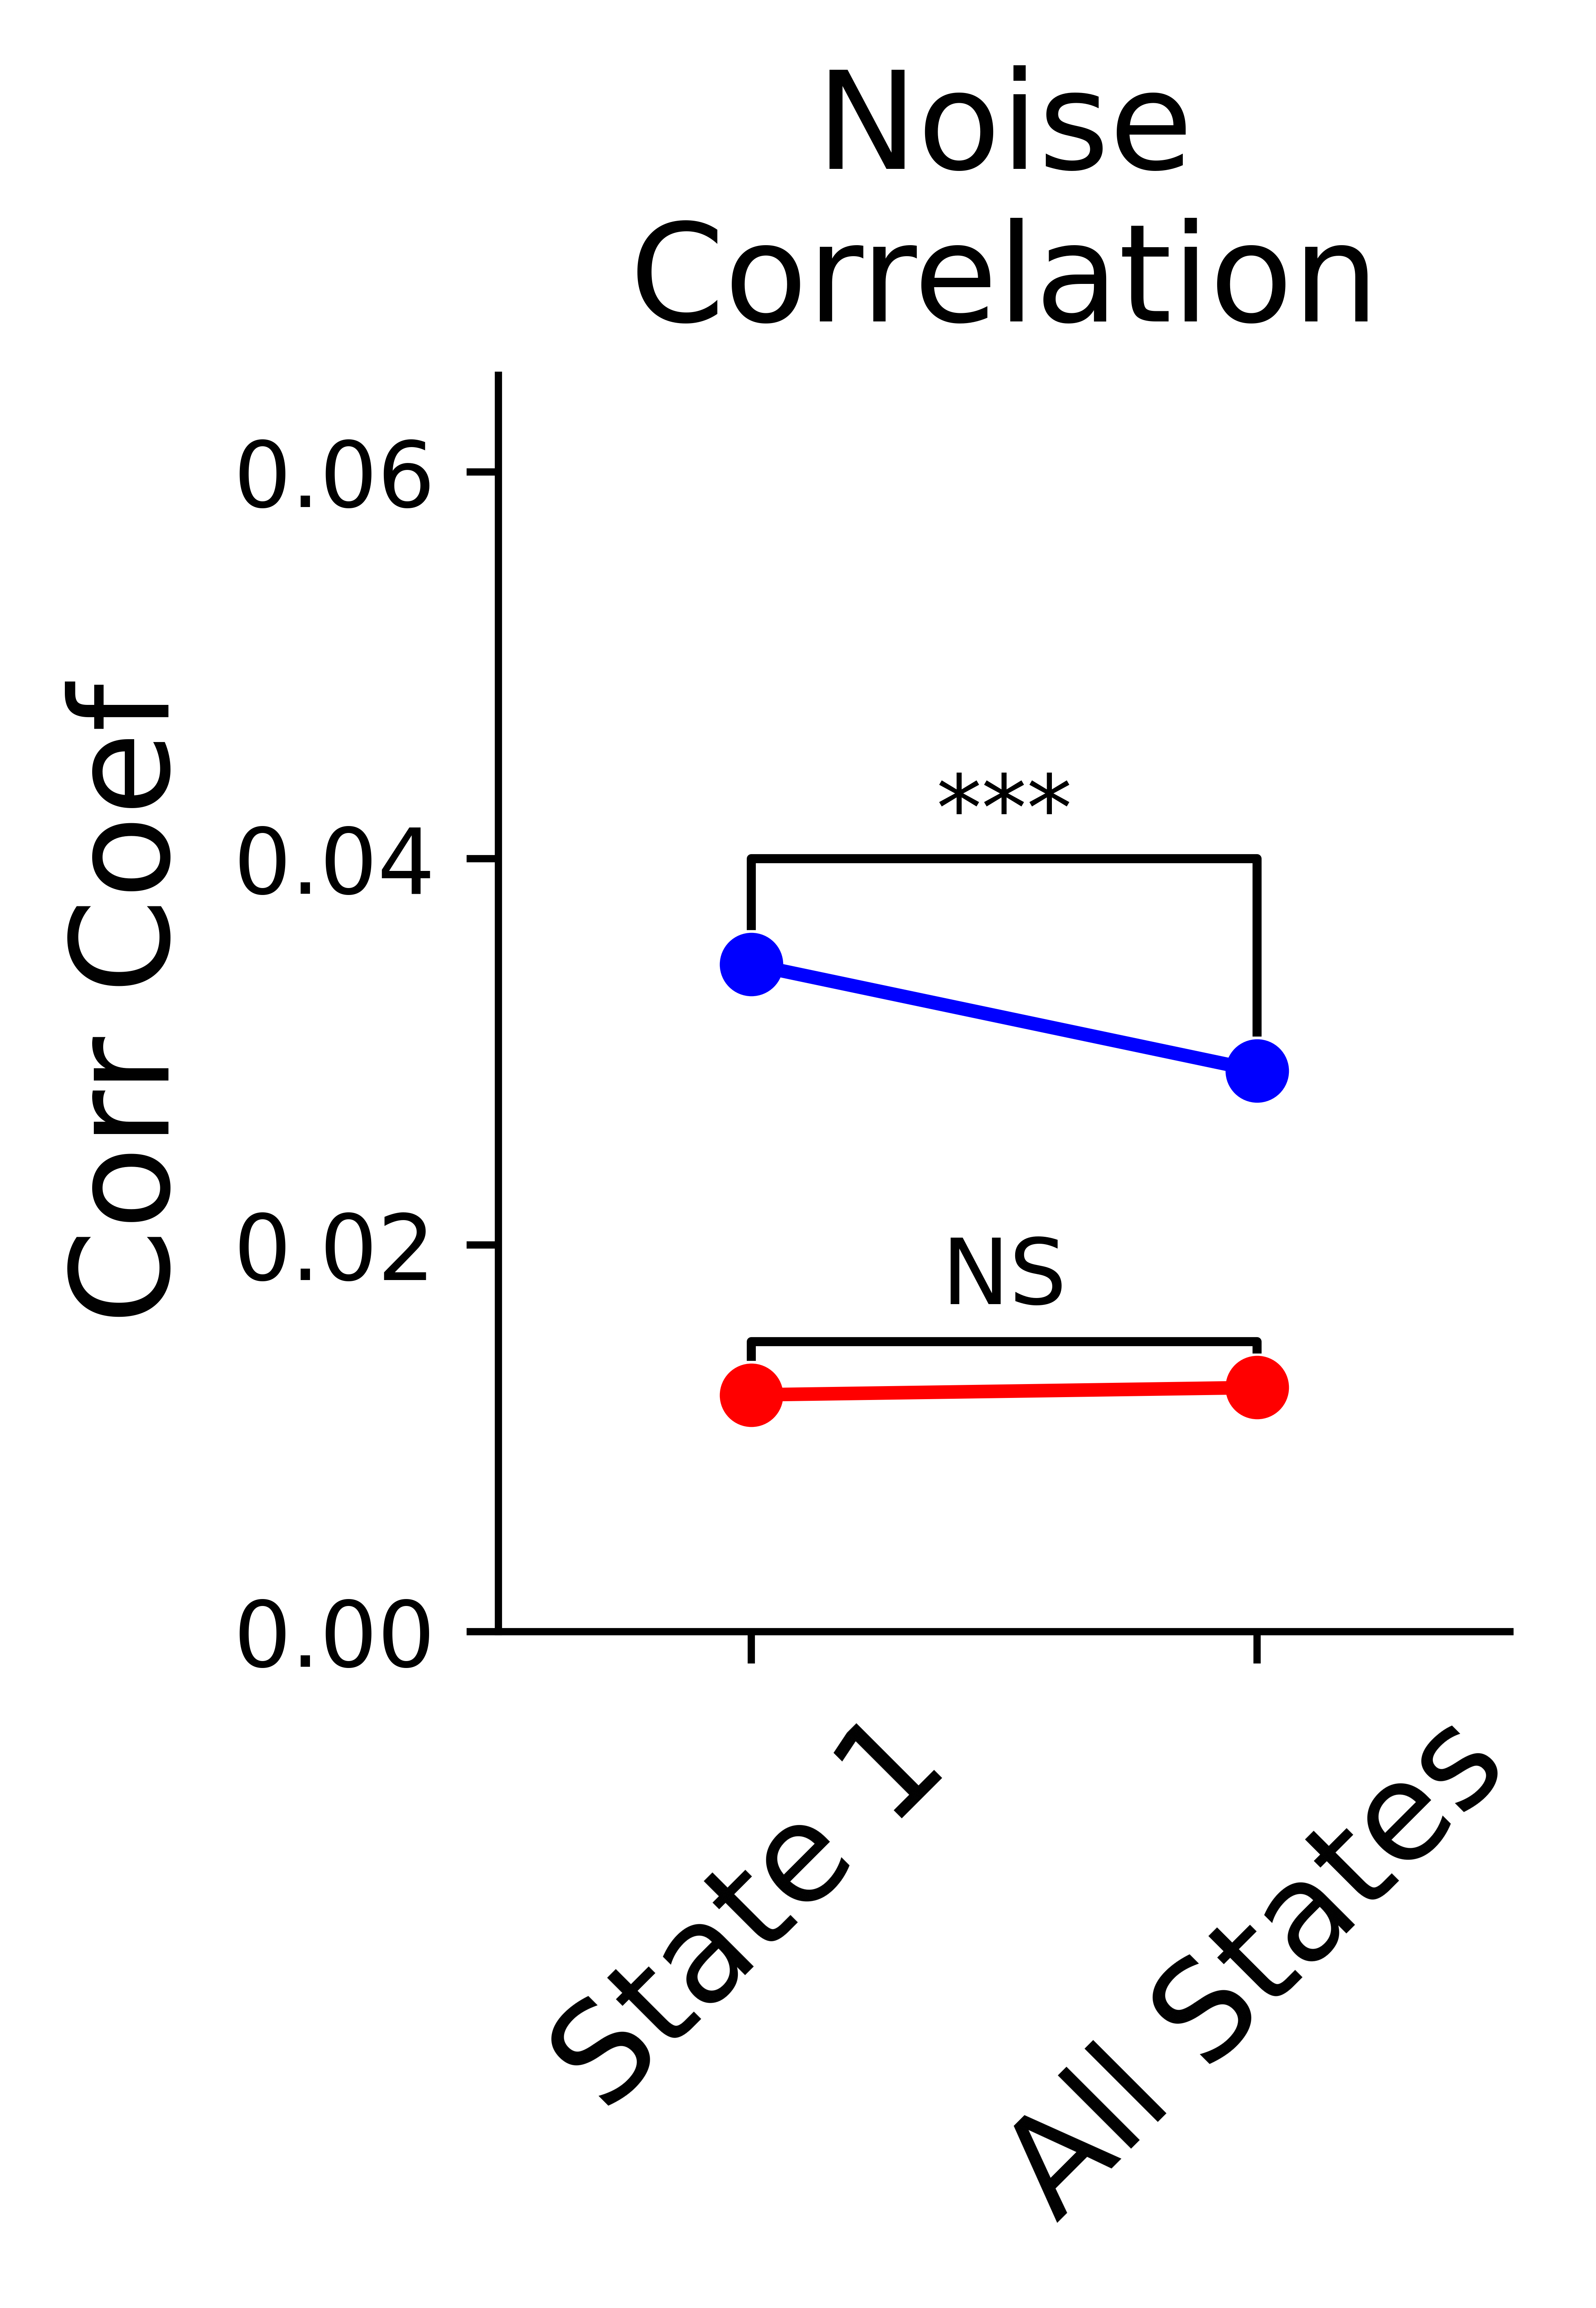

In [6]:
fig, axs = plt.subplots(1,figsize = (2,2.5), dpi=dpi, sharey=True)

axs.errorbar(x=[1,2], y=[np.mean(noise_corr_st1_AC), np.mean(noise_corr_st23_AC)], yerr=[scipy.stats.sem(noise_corr_st23_AC), scipy.stats.sem(noise_corr_st23_AC)], fmt='o', color='red')
axs.plot([1,2], [np.mean(noise_corr_st1_AC), np.mean(noise_corr_st23_AC)], color='red')

axs.errorbar(x=[1,2], y=[np.mean(noise_corr_st1_PPC), np.mean(noise_corr_st23_PPC)], yerr=[scipy.stats.sem(noise_corr_st1_PPC), scipy.stats.sem(noise_corr_st23_PPC)], fmt='o', color='blue')
axs.plot([1,2], [np.mean(noise_corr_st1_PPC), np.mean(noise_corr_st23_PPC)], color='blue')

axs.set_xticks(list(range(1,3)))
axs.set_xticklabels(['State 1', 'All States'], rotation=45, fontsize=15)
axs.set_ylabel('Corr Coef', fontsize=15)
axs.set_title('Noise\nCorrelation', fontsize=15)

axs.set_ylim([.01, .065])
axs.set_xlim([0.5,2.5])
axs.set_yticks([0, .02, .04, .06])

axs.plot([1, 1, 2, 2], [np.mean(noise_corr_st1_PPC)+.002,.04,.04,np.mean(noise_corr_st23_PPC)+.002], lw=1, c='black')
axs.text((1 + 2) / 2, .04, "***", ha='center', va='bottom', color='black')

axs.plot([1, 1, 2, 2], [np.mean(noise_corr_st1_AC)+.002,.015,.015,np.mean(noise_corr_st23_AC)+.002], lw=1, c='black')
axs.text((1 + 2) / 2, .016, "NS", ha='center', va='bottom', color='black')

plt.savefig(save_path + 'noise_correlations.svg', format='svg', bbox_inches="tight")

## Figure 4 B,C

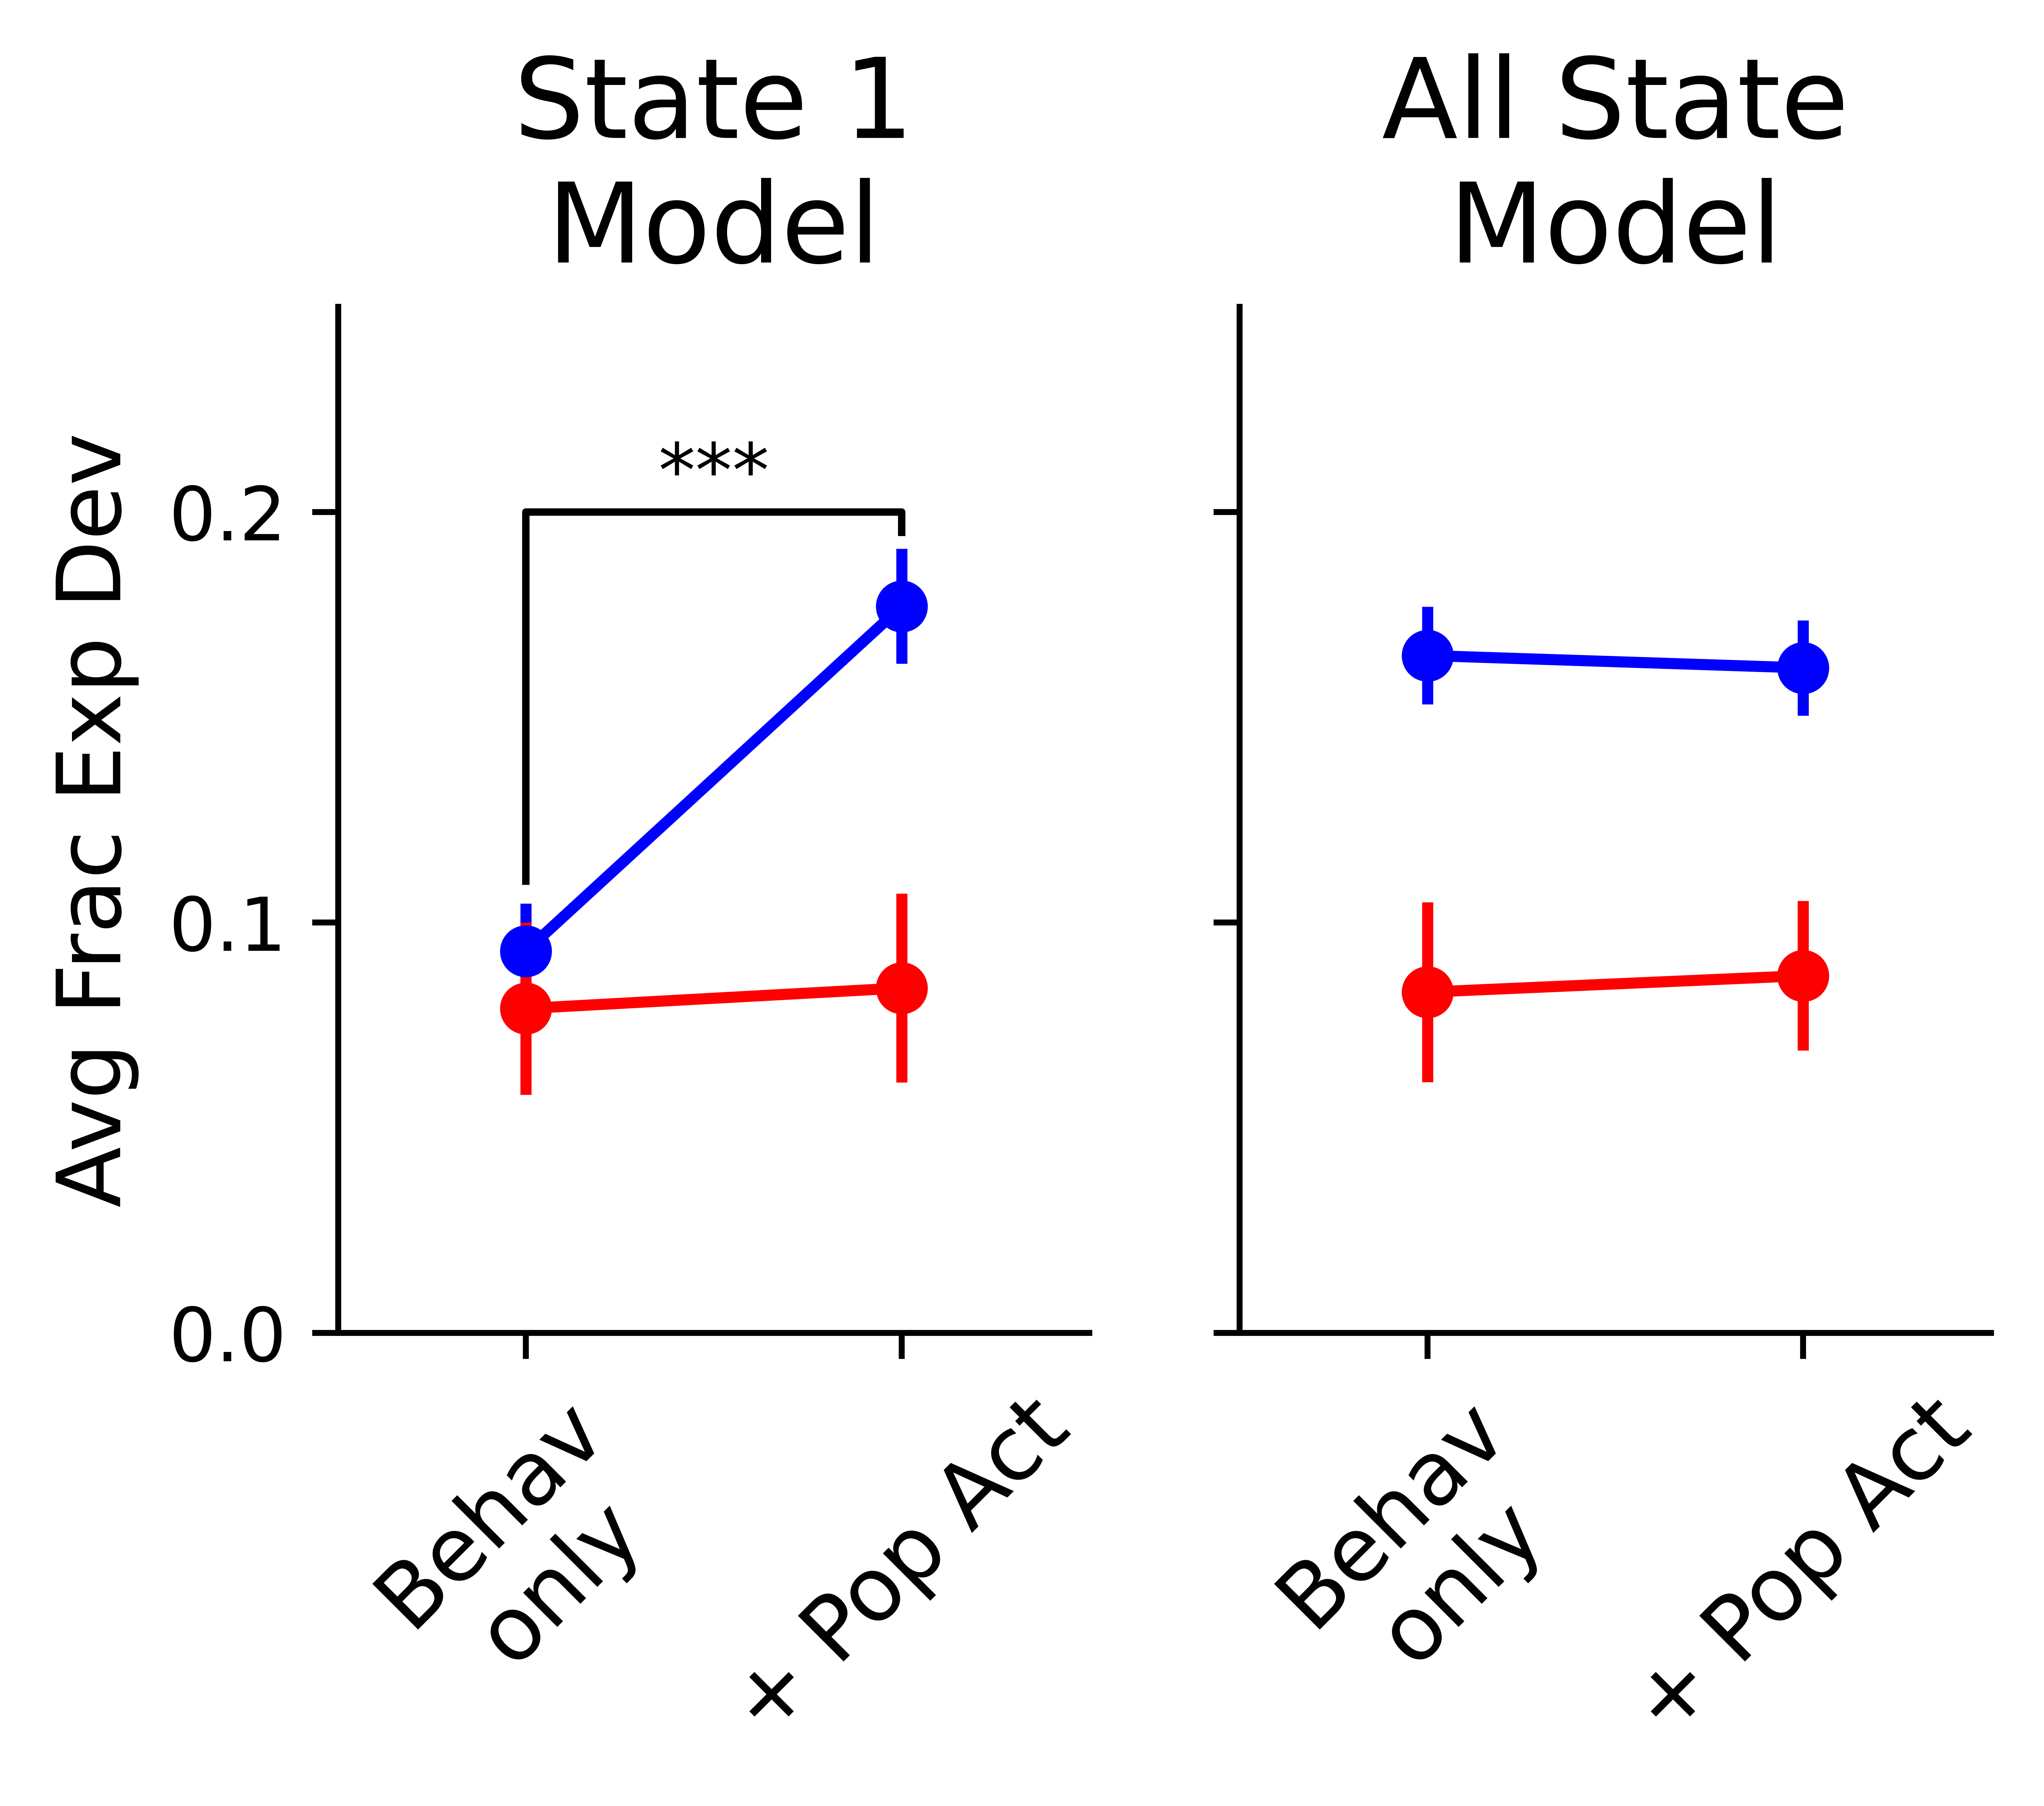

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(4,2.5), dpi=dpi, sharey=True)


axs[1].errorbar(x=[1,2], y=PPC_all_coupling[0], yerr=PPC_all_coupling[1], fmt='o', color='blue')
axs[1].plot([1,2], PPC_all_coupling[0], color='blue')

axs[1].errorbar(x=[1,2], y=AC_all_coupling[0], yerr=AC_all_coupling[1], fmt='o', color='red')
axs[1].plot([1,2], AC_all_coupling[0], color='red')

axs[1].set_xticks(list(range(1,3)))
axs[1].set_xticklabels(['Behav\nonly', '+ Pop Act'], rotation=45, fontsize=12)
axs[0].set_ylabel('Avg Frac Exp Dev', fontsize=12)
axs[1].set_ylim([0, .25])
axs[1].set_xlim([0.5,2.5])
axs[1].set_yticks([0, .1, .2])

axs[1].spines['top'].set_visible(False) 
axs[1].spines['right'].set_visible(False)
axs[1].set_title('All State\nModel', fontsize=15, color='black')

axs[0].errorbar(x=[1,2], y=PPC_1_coupling[0], yerr=PPC_1_coupling[1], fmt='o', color='blue')
axs[0].plot([1,2], PPC_1_coupling[0], color='blue')

axs[0].errorbar(x=[1,2], y=AC_1_coupling[0], yerr=AC_1_coupling[1], fmt='o', color='red')
axs[0].plot([1,2], AC_1_coupling[0], color='red')

axs[0].set_xticks(list(range(1,3)))
axs[0].set_xticklabels(['Behav\nonly', '+ Pop Act'], rotation=45, fontsize=12)
axs[0].axhline(y=50, color='grey', linestyle='--')
axs[0].set_ylim([0, .25])
axs[0].set_xlim([0.5,2.5])
axs[0].set_yticks([0, .1, .2])
axs[0].plot([1, 1, 2, 2], [.11,.2,.2,.195], lw=1, c='black')
axs[0].text((1 + 2) / 2, .20, "***", ha='center', va='bottom', color='black')

axs[0].spines['top'].set_visible(False) 
axs[0].spines['right'].set_visible(False)
axs[0].set_title('State 1\nModel', fontsize=15, color='black')

#fig.tight_layout()
plt.savefig(save_path + 'effect_of_corr_on_GLM.svg', format='svg', bbox_inches="tight")

## Figure 4D

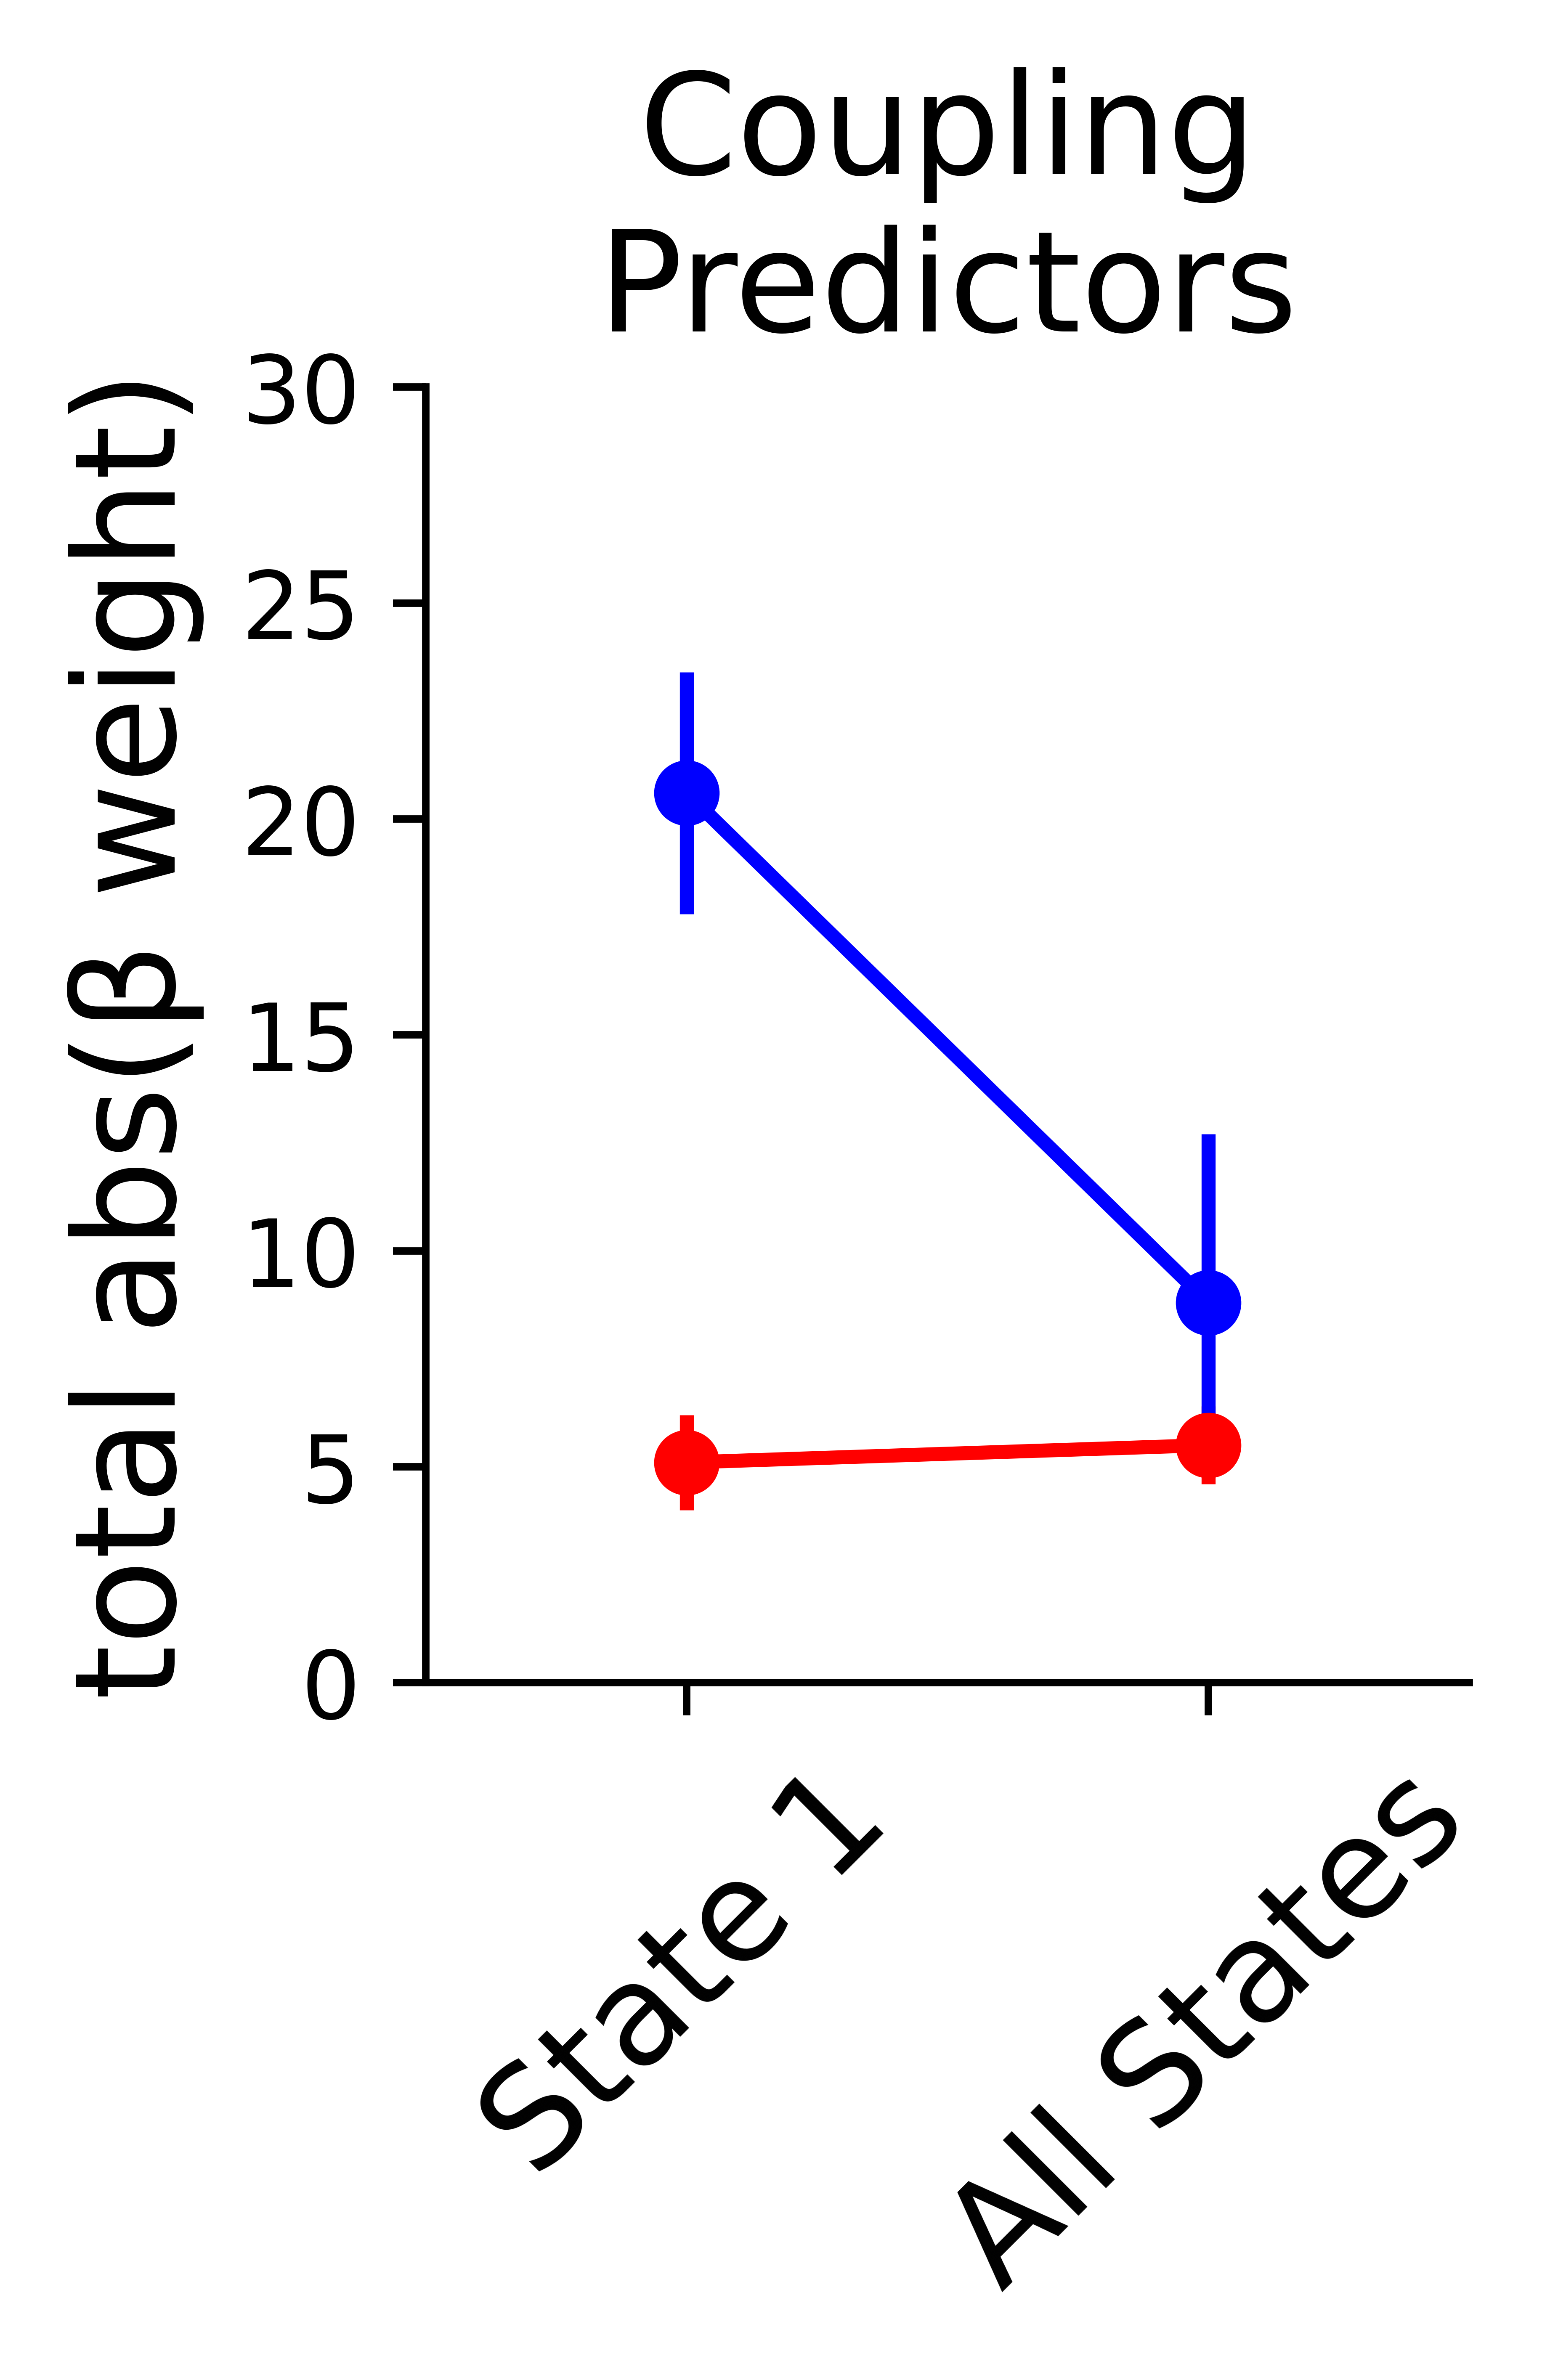

In [9]:
fig, axs = plt.subplots(1, figsize = (2,2.5), dpi=dpi, sharey=False)

axs.errorbar(x=[1,2], y=AC_B_coupling[0], yerr=AC_B_coupling[1], fmt='o', color='red')
axs.plot([1,2], AC_B_coupling[0], color='red')

axs.errorbar(x=[1,2], y=PPC_B_coupling[0], yerr=PPC_B_coupling[1], fmt='o', color='blue')
axs.plot([1,2], PPC_B_coupling[0], color='blue')

axs.set_ylim([0,30])
axs.set_title("Coupling\nPredictors", fontsize=15)
axs.set_xticks(list(range(1,3)))
axs.set_ylabel('total abs(β weight)', fontsize=15)
axs.set_xticklabels(['State 1', 'All States'], rotation=45, fontsize=15)
axs.set_xlim([0.5,2.5])

#axs.plot([1, 1, 2, 2], [3.8,3.8,3.8,4.4], lw=1, c='black')
#axs.text((1 + 2) / 2, 1.5, "NS", ha='center', va='bottom', color='black')

#axs.plot([1, 1, 2, 2], [23.8,25,25,13], lw=1, c='black')
#axs.text((1 + 2) / 2, 25, "***", ha='center', va='bottom', color='black')

plt.savefig(save_path + 'coupling_B_weights.svg', format='svg', bbox_inches="tight")